# Pore Radius

In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [20]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']

In [298]:
def pore_rad_old(traj_note,location = '/media/scottzhuang/data/MD/'):
    #traj_note = "5NJY_pH70_md1/5NJY_pH70_md1"
    top_location = traj_note + ".protein.gro"
    traj_name = traj_note + ".skip10.protein.xtc"    
    traj = md.load(location + traj_name,top= location +top_location)
    pore_radius = []
    for i in range(215,235):
        group_1 = np.arange(i,i + 1245, 311)
        import itertools
        pairs = list(itertools.product(group_1,group_1))
        new_pair = []
        for pair in pairs:
            if pair[0] != pair[1] and pair[0] - pair[1] != 311 and pair[0] - pair[1] != -311 :
                new_pair.append(pair)
        pore_radius.append([i+5, md.compute_contacts(traj, new_pair)[0].min()])
        plt.scatter(i+5,np.mean(md.compute_contacts(traj, new_pair)[0],axis=0).min())

In [388]:
def pore_rad_old_2(traj_note,location = '/media/scottzhuang/data/MD/'):
    top_location = traj_note + ".protein.gro"
    traj_name = traj_note + ".skip10.protein.xtc"    
    traj = md.load(location + traj_name,top = location +top_location)
    ca_top_location = traj_note + ".ca.gro"
    ca_traj_name = traj_note + ".skip10.ca.xtc"    
    ca_traj = md.load(location + ca_traj_name,top = location + ca_top_location)
    topology = traj.topology
    pore_radius = []
    for i in range(215,235):
        group_1 = np.arange(i,i + 1245, 311)
        xyz_inter = np.mean(ca_traj.xyz[:,group_1],axis=1)
        chain = topology.add_chain()
        residue = topology.add_residue('ALA',chain)
        topology.add_atom('H','H',residue)
        traj.topology = topology
        traj.xyz = np.append(traj.xyz,xyz_inter.reshape([traj.n_frames,1,3]),axis=1)
        import itertools
        pairs = list(itertools.product(group_1,[1555+i-215]))
        plt.scatter(i+5,np.mean(md.compute_contacts(traj, pairs)[0]))

In [72]:
def pore_rad(traj_note,location = '/media/scottzhuang/data/MD/'):
    top_location = traj_note + '/' + traj_note + ".protein.gro"
    traj_name = traj_note + '/' + traj_note +  ".skip10.protein.xtc"    
    traj = md.load(location + traj_name,top = location +top_location)
    ca_top_location = traj_note + '/' + traj_note +  ".ca.pdb"
    ca_traj_name = traj_note + '/' + traj_note +  ".skip10.ca.xtc"    
    ca_traj = md.load(location + ca_traj_name,top = location + ca_top_location)
    topology = traj.topology
    pore_profile = pd.DataFrame(columns=['traj_time','resid','pore_radius'])
    m = 0
    incre = 0
    for i in [217,221,225,228,232]:
        group_1 = np.arange(i,i + 1245, 311)
        xyz_inter = np.mean(ca_traj.xyz[:,group_1],axis=1)
        chain = topology.add_chain()
        residue = topology.add_residue('ALA',chain)
        topology.add_atom('H','H',residue)
        traj.topology = topology
        traj.xyz = np.append(traj.xyz,xyz_inter.reshape([traj.n_frames,1,3]),axis=1)
        pairs = list(itertools.product(group_1,[1555 + incre]))
        for j in range(0,traj.n_frames):
            pore_profile.loc[m] = [j,i,np.mean(md.compute_contacts(traj[j], pairs)[0])]
            m = m + 1
        incre = incre +1
    pore_data_222.extend(pore_profile[pore_profile['resid'] == 217]['pore_radius'])

In [71]:
import itertools
pore_data_222 = []
pore_data_226 = []
pore_data_231 = []
pore_data_233 = []
pore_data_237 = []
for traj_note in traj_notes:
    pore_rad(traj_note)

<mdtraj.Topology with 2 chains, 1556 residues, 27771 atoms, 0 bonds>


IndexError: list index out of range

In [75]:
pore_data_222 = []
pore_data_222.extend(pore_profile[pore_profile['resid'] == 217]['pore_radius'])

In [73]:
pore_profile

,traj_time,resid,pore_radius
0,0.0,217.0,0.298055
1,1.0,217.0,0.411899
2,2.0,217.0,0.383733
3,3.0,217.0,0.365128
4,4.0,217.0,0.365340
5,5.0,217.0,0.430840
6,6.0,217.0,0.415581
7,7.0,217.0,0.426049
8,8.0,217.0,0.346200
9,9.0,217.0,0.314968


## resid 222, 226, 230, 233, 237

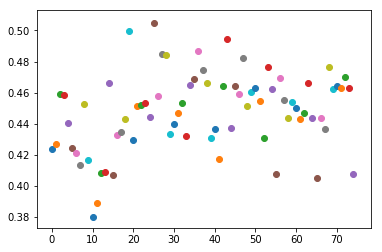

In [484]:
for i in range(0,1500):
    
    if pore_profile['resid'][i] == 221:
        plt.scatter(pore_profile['traj_time'][i],pore_profile['pore_radius'][i])

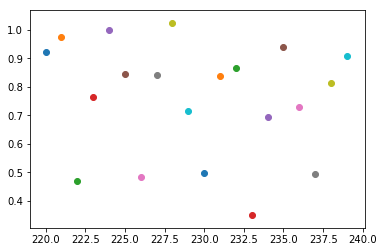

In [389]:
pore_rad("4NPQ_PH70_md5/4NPQ_pH70_md5")

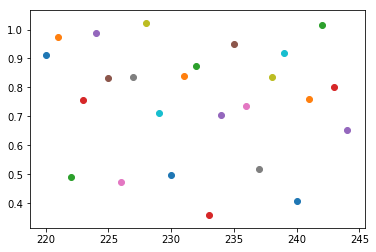

In [335]:
pore_rad("4NPQ_F238L_PH70_md3/4NPQ_F238L_pH70_md3")

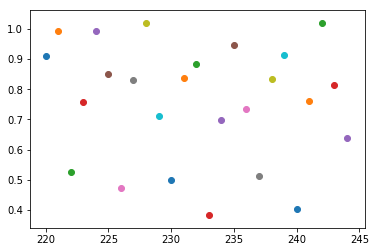

In [336]:
pore_rad("4NPQ_F238LI233T_PH70_md3/4NPQ_F238LI233T_pH70_md3")

# HOLE software